In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
from tensorflow.keras.datasets import cifar10

Init Plugin
Init Graph Optimizer
Init Kernel


In [3]:
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

Every picture is 32 x 32 with 3 color channels.

In [4]:
X_train.shape

(50000, 32, 32, 3)

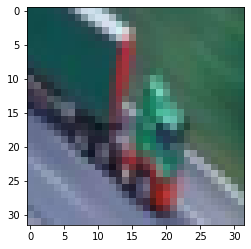

In [5]:
plt.imshow(X_train[50])

In [6]:
X_train[50].max(), X_train[50].min()

(243, 8)

In [7]:
X_train.max(), X_train.min()

(255, 0)

In [8]:
X_train = X_train / 255
X_test = X_test / 255

In [9]:
X_test.shape

(10000, 32, 32, 3)

In [10]:
X_train.shape

(50000, 32, 32, 3)

In [11]:
y_train

array([[6],
       [9],
       [9],
       ...,
       [9],
       [1],
       [1]], dtype=uint8)

In [12]:
y_test

array([[3],
       [8],
       [8],
       ...,
       [5],
       [1],
       [7]], dtype=uint8)

In [13]:
from tensorflow.keras.utils import to_categorical

There are 10 different classes in the dataset to turn them into categorical data:
- airplane
- automobile
- bird
- cat
- deer
- dog
- frog
- horse
- ship
- truck

In [14]:
y_cat_train = to_categorical(y_train, 10)
y_cat_test = to_categorical(y_test, 10)

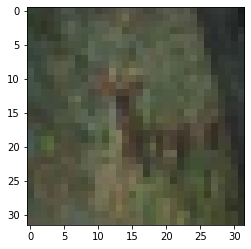

In [15]:
plt.imshow(X_train[10])

In [16]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten

In [17]:
model = Sequential()

Metal device set to: Apple M1


2022-07-19 20:03:09.672858: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2022-07-19 20:03:09.672944: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [18]:
# convolutional layer
model.add(Conv2D(filters= 32, kernel_size= (4, 4), input_shape= (32, 32, 3), activation= "relu"))
# pooling layer
model.add(MaxPool2D(pool_size= (2, 2)))

# adding another layers
model.add(Conv2D(filters= 32, kernel_size= (4, 4), input_shape= (32, 32, 3), activation= "relu"))
model.add(MaxPool2D(pool_size= (2, 2)))

model.add(Flatten())
model.add(Dense(256, activation= "relu"))
model.add(Dense(10, activation= "softmax"))

model.compile(optimizer= "adam", loss= "categorical_crossentropy", 
             metrics= ["accuracy"])

In [19]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 29, 29, 32)        1568      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 32)        16416     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 32)          0         
_________________________________________________________________
flatten (Flatten)            (None, 800)               0         
_________________________________________________________________
dense (Dense)                (None, 256)               205056    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                2

In [20]:
from tensorflow.keras.callbacks import EarlyStopping

In [23]:
early_stop = EarlyStopping(monitor= "val_loss", patience= 2)

In [24]:
model.fit(X_train, y_cat_train, epochs= 15, validation_data= (X_test, y_cat_test), 
         callbacks= [early_stop])

2022-07-19 20:07:38.796277: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:176] None of the MLIR Optimization Passes are enabled (registered 2)
2022-07-19 20:07:38.799081: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


Epoch 1/15


2022-07-19 20:07:39.019120: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


1563/1563 [==============================] - ETA: 0s - loss: 1.5012 - accuracy: 0.4578

2022-07-19 20:07:58.340090: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


1563/1563 [==============================] - 21s 11ms/step - loss: 1.5012 - accuracy: 0.4578 - val_loss: 1.2566 - val_accuracy: 0.5481
Epoch 2/15
1563/1563 [==============================] - 18s 11ms/step - loss: 1.1890 - accuracy: 0.5771 - val_loss: 1.1834 - val_accuracy: 0.5838
Epoch 3/15
1563/1563 [==============================] - 18s 11ms/step - loss: 1.0587 - accuracy: 0.6279 - val_loss: 1.0888 - val_accuracy: 0.6213
Epoch 4/15
1563/1563 [==============================] - 18s 11ms/step - loss: 0.9598 - accuracy: 0.6635 - val_loss: 0.9994 - val_accuracy: 0.6495
Epoch 5/15
1563/1563 [==============================] - 18s 12ms/step - loss: 0.8720 - accuracy: 0.6962 - val_loss: 1.0517 - val_accuracy: 0.6351
Epoch 6/15
1563/1563 [==============================] - 18s 11ms/step - loss: 0.8018 - accuracy: 0.7200 - val_loss: 0.9962 - val_accuracy: 0.6548
Epoch 7/15
1563/1563 [==============================] - 18s 11ms/step - loss: 0.7328 - accuracy: 0.7404 - val_loss: 1.0687 - val_accura

In [25]:
metrics = pd.DataFrame(model.history.history)
metrics

,loss,accuracy,val_loss,val_accuracy
0,1.501212,0.45782,1.256569,0.5481
1,1.188952,0.57714,1.183351,0.5838
2,1.058700,0.62794,1.088783,0.6213
3,0.959819,0.66346,0.999399,0.6495
4,0.872032,0.69616,1.051673,0.6351
5,0.801793,0.72002,0.996222,0.6548
6,0.732795,0.74038,1.068743,0.6456
7,0.671759,0.76434,0.997823,0.6696


<AxesSubplot:>

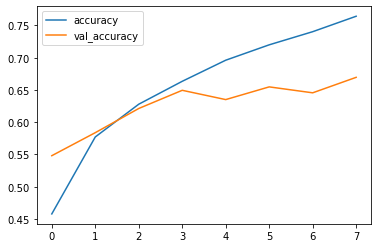

In [26]:
metrics[["accuracy", "val_accuracy"]].plot()

<AxesSubplot:>

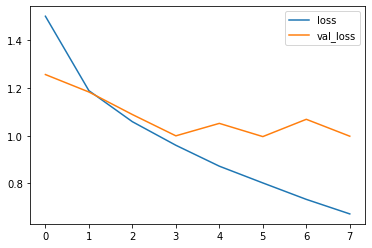

In [27]:
metrics[["loss", "val_loss"]].plot()

In [28]:
model.evaluate(X_test, y_cat_test, verbose= 1)

313/313 [==============================] - 2s 6ms/step - loss: 0.9978 - accuracy: 0.6696


[0.997823178768158, 0.6696000099182129]

In [29]:
from sklearn.metrics import classification_report, confusion_matrix

In [30]:
y_pred = model.predict_classes(X_test)
print(classification_report(y_test, y_pred))

/Users/ankaraunifedaisi/miniforge3/envs/tensorflow/lib/python3.9/site-packages/tensorflow/python/keras/engine/sequential.py:455: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '
2022-07-19 20:36:22.536232: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


              precision    recall  f1-score   support

           0       0.77      0.68      0.72      1000
           1       0.81      0.78      0.79      1000
           2       0.54      0.63      0.58      1000
           3       0.41      0.58      0.48      1000
           4       0.67      0.58      0.62      1000
           5       0.60      0.53      0.57      1000
           6       0.71      0.77      0.74      1000
           7       0.73      0.71      0.72      1000
           8       0.84      0.73      0.78      1000
           9       0.79      0.70      0.74      1000

    accuracy                           0.67     10000
   macro avg       0.69      0.67      0.67     10000
weighted avg       0.69      0.67      0.67     10000



In [31]:
confusion_matrix(y_test, y_pred)

array([[680,  19,  95,  36,  28,  11,  12,  15,  68,  36],
       [ 19, 777,  15,  29,   1,  10,  27,   8,  26,  88],
       [ 43,   4, 631, 111,  54,  50,  63,  32,   4,   8],
       [ 11,   6,  90, 582,  46, 141,  69,  45,   5,   5],
       [ 16,   6, 109, 116, 580,  34,  61,  65,  11,   2],
       [  5,   3,  71, 261,  38, 531,  31,  56,   1,   3],
       [  6,   3,  54,  98,  37,  24, 766,   9,   2,   1],
       [ 13,   5,  33,  87,  73,  46,  18, 715,   2,   8],
       [ 68,  45,  44,  38,   8,  12,  12,   8, 731,  34],
       [ 26,  89,  24,  60,   5,  20,  17,  31,  25, 703]])

<AxesSubplot:>

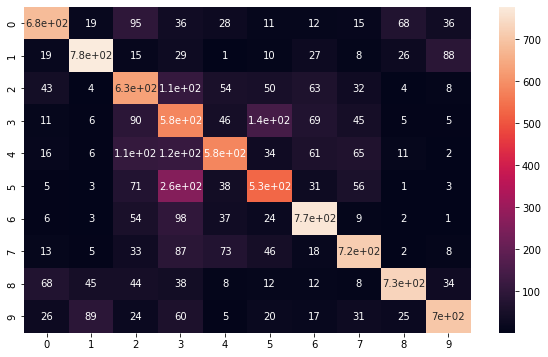

In [34]:
import seaborn as sns 

plt.figure(figsize= (10, 6))
sns.heatmap(confusion_matrix(y_test, y_pred), annot= True)

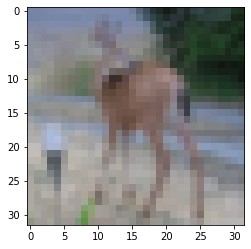

In [35]:
test_image = X_test[100]
plt.imshow(test_image)

In [36]:
y_test[100]

array([4], dtype=uint8)

In [38]:
model.predict_classes(test_image.reshape(1, 32, 32, 3))

/Users/ankaraunifedaisi/miniforge3/envs/tensorflow/lib/python3.9/site-packages/tensorflow/python/keras/engine/sequential.py:455: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


array([4])

[6]


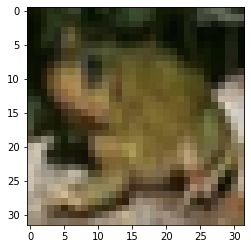

In [44]:
test_image2 = X_test[333]
print(y_test[333])
plt.imshow(test_image2)

In [45]:
model.predict_classes(test_image2.reshape(1, 32, 32, 3))

array([6])

In [49]:
test_image3 = X_test[16]
y_test[16]

array([5], dtype=uint8)

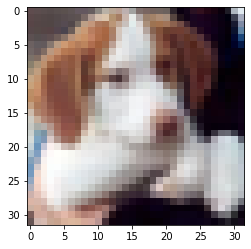

In [50]:
plt.imshow(test_image3)

In [52]:
model.predict_classes(test_image3.reshape(1, 32, 32, 3))

/Users/ankaraunifedaisi/miniforge3/envs/tensorflow/lib/python3.9/site-packages/tensorflow/python/keras/engine/sequential.py:455: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


array([5])

# :D